In [24]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import statmdoels for timeseries

import statsmodels.api as sm

In [3]:
# Set parameters for plot

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [11]:
# Import Air Passneger data into pandas dataframe

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('D:/Study/DataScience/TimeSeries/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [12]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.rename(columns={"#Passengers": "Passengers"}, inplace= True)

In [18]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [48]:
df2 = df['Passengers'].resample('MS').mean()

In [49]:
df2['1960':]

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, dtype: int64

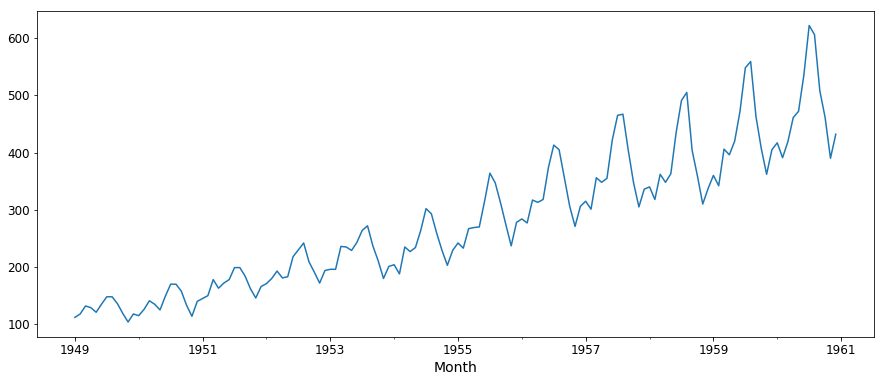

In [50]:
# Plot the to visualize time series data

df2.plot(figsize=(15, 6))
plt.show()

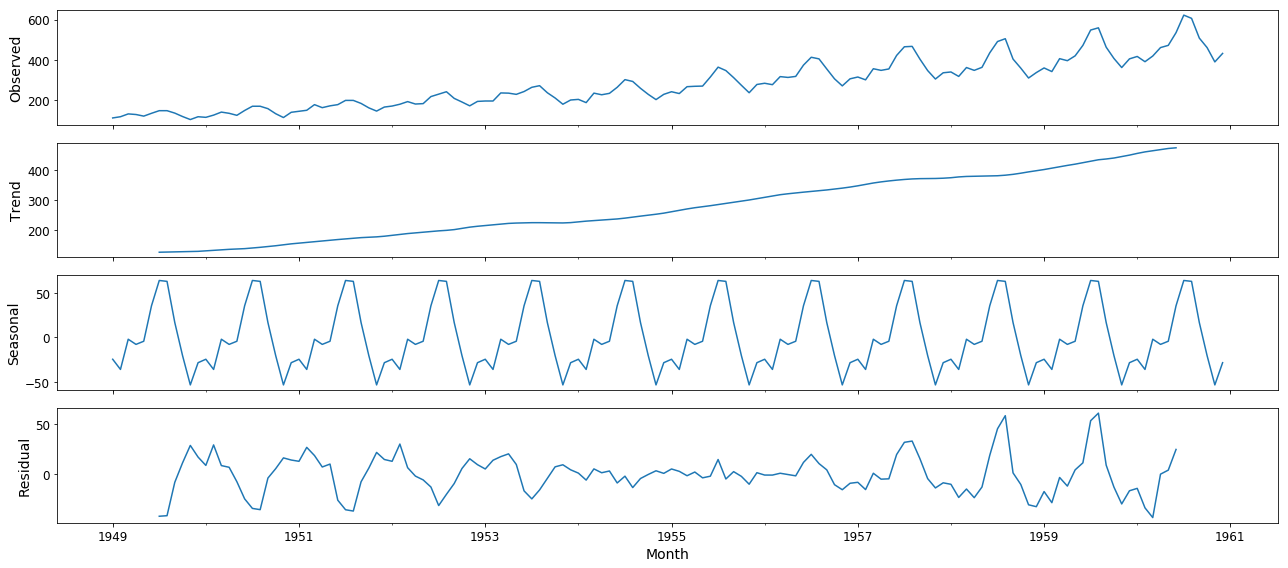

In [51]:
# Use decomposition method to visualize the various components of time series data

from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')
fig = decomposition.plot()
plt.show()

<h1> Time Series Modelling with ARIMA </h1>

In [22]:
import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [52]:
# Perform Grid Search to find optimal parameters for ARIMA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} X 12 - AIC:{}'.format(param, param_seasonal, np.round(results.aic,2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) X 12 - AIC:2044.43
ARIMA (0, 0, 0) x (0, 0, 1, 12) X 12 - AIC:1887.29
ARIMA (0, 0, 0) x (0, 1, 0, 12) X 12 - AIC:1315.92
ARIMA (0, 0, 0) x (0, 1, 1, 12) X 12 - AIC:1156.29
ARIMA (0, 0, 0) x (1, 0, 0, 12) X 12 - AIC:1118.63
ARIMA (0, 0, 0) x (1, 0, 1, 12) X 12 - AIC:1107.26
ARIMA (0, 0, 0) x (1, 1, 0, 12) X 12 - AIC:1109.24
ARIMA (0, 0, 0) x (1, 1, 1, 12) X 12 - AIC:1033.62
ARIMA (0, 0, 1) x (0, 0, 0, 12) X 12 - AIC:1846.08
ARIMA (0, 0, 1) x (0, 0, 1, 12) X 12 - AIC:1567.99
ARIMA (0, 0, 1) x (0, 1, 0, 12) X 12 - AIC:1197.0
ARIMA (0, 0, 1) x (0, 1, 1, 12) X 12 - AIC:1072.14
ARIMA (0, 0, 1) x (1, 0, 0, 12) X 12 - AIC:1071.0
ARIMA (0, 0, 1) x (1, 0, 1, 12) X 12 - AIC:1049.58
ARIMA (0, 0, 1) x (1, 1, 0, 12) X 12 - AIC:1059.51
ARIMA (0, 0, 1) x (1, 1, 1, 12) X 12 - AIC:985.33
ARIMA (0, 1, 0) x (0, 0, 0, 12) X 12 - AIC:1405.0
ARIMA (0, 1, 0) x (0, 0, 1, 12) X 12 - AIC:1194.71
ARIMA (0, 1, 0) x (0, 1, 0, 12) X 12 - AIC:1024.48
ARIMA (0, 1, 0) x (0, 1, 1, 12) X 1

In [53]:
# From the above results """ARIMA (0, 1, 1) x (1, 1, 1, 12) X 12 - AIC:920.32""" gives the mimimum AIC value

mod = sm.tsa.statespace.SARIMAX(df2,order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285     -1.967      0.049      -1.117      -0.002
ma.S.L12       0.4077      0.336      1.212      0.225      -0.251       1.067
sigma2       140.2869     18.080      7.759      0.000     104.852     175.722


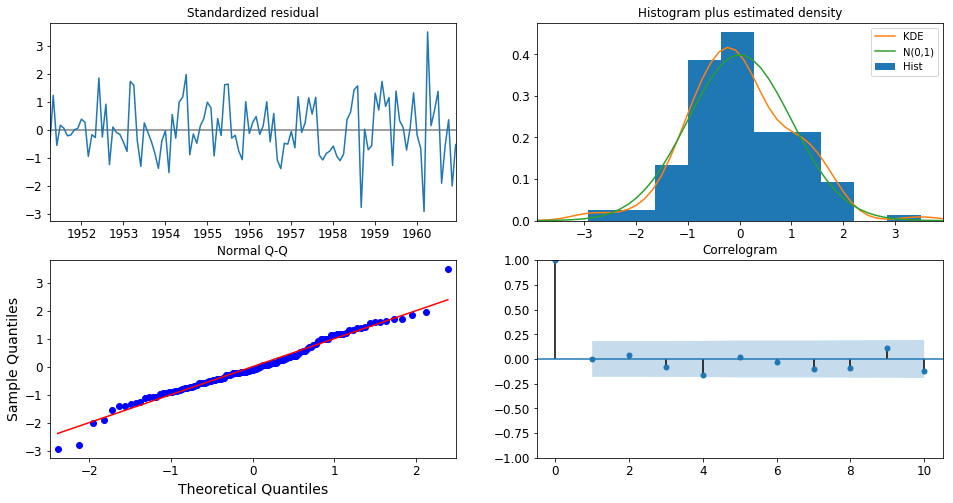

In [54]:
# Run model diagonstics

results.plot_diagnostics(figsize=(16, 8))
plt.show()

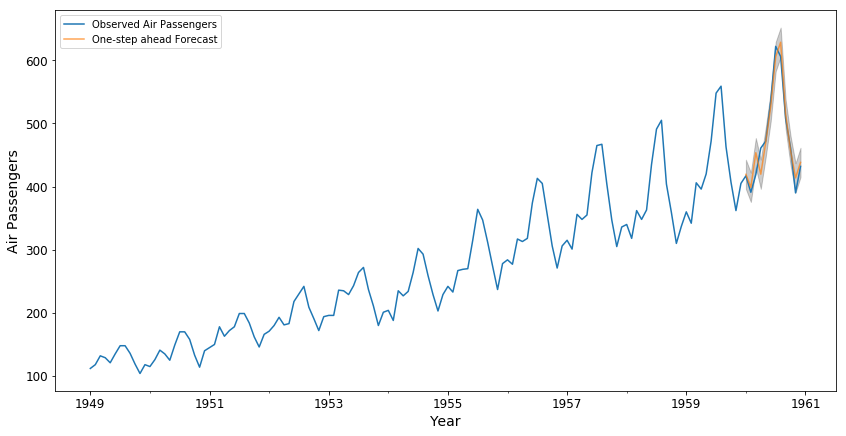

In [55]:
# Validating forecasts

pred = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df2['1949':].plot(label='Observed Air Passengers')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Air Passengers')
plt.legend()
plt.show()

In [56]:
# Evaluating the model

df2_forecasted = pred.predicted_mean
df2_truth = df2['1960-01-01':]
mse = ((df2_forecasted - df2_truth) ** 2).mean()
print('The MSE of our forecast is: {}'.format(round(mse, 2)))

print('The RMSE of our forecasts is: {}'.format(round(np.sqrt(mse), 2)))

The MSE of our forecast is: 374.73
The RMSE of our forecasts is: 19.36


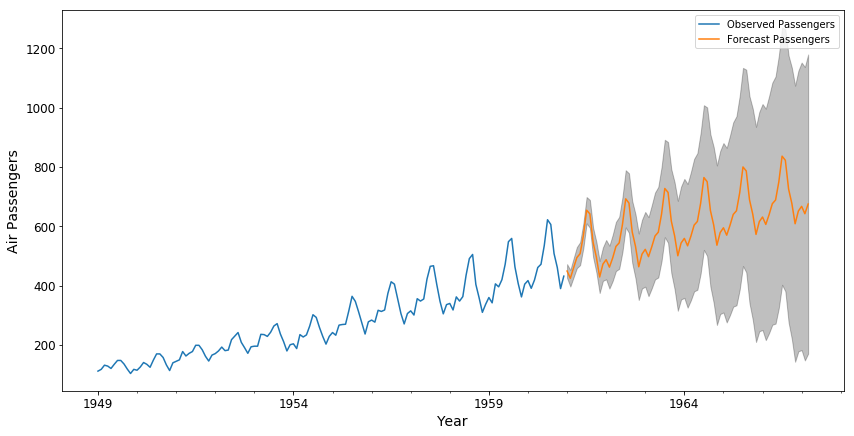

In [63]:
# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = df2.plot(label='Observed Passengers', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast Passengers')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Air Passengers')
plt.legend()
plt.show()

In [62]:
pred_ci

,lower Passengers,upper Passengers
1961-01-01,425.943387,472.372101
1961-02-01,396.884819,452.639874
1961-03-01,427.997342,491.728236
1961-04-01,458.961064,529.775099
1961-05-01,469.058363,546.308788
1961-06-01,526.121568,609.311885
1961-07-01,609.682420,698.415895
1961-08-01,594.749081,688.699229
1961-09-01,495.779859,594.671876
1961-10-01,444.025057,547.623472
